In [1]:
####################################################################
###    This is the PYTHON version of program 4.1 from page 118 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is a 2 strain SIR disease model, where parameter alpha      #
### governs partial susceptibility and parameter a governs partial #
### transmissibility. Note that in theory alpha or a could be      #
### greater than one to imply enhanced susceptibility or 		   #
### transmissibility.											   #
####################################################################

In [2]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
from matplotlib.font_manager import FontProperties

*beta[i] is the basic transmission rate for strain i.

*gamma[i] is the recovery rate for strain i.

*nu is the birth rate, which is set equal to mu.

*mu is the per capita death rate.

*alpha[i] is the modified susceptiblity to strain i for those individuals recovered from the other strain.

*a[i] is the modified transmission rate of strain i from those individuals that have recovered from the other strain.

*I is the initial proportion of the population in each group is set within the program.

In [3]:
beta=np.array([260, 520])/365.0;
gamma=np.array([1, 1])/7.0;
nu=mu=1/(70*365.0);
alpha=np.array([0.5, 0.4]);
a=np.array([0.4, 0.5]);
ND=MaxTime=100*365;
TS=1.0
NSS=0.1; NIS=1e-4;NRS=0.02;NRI=0.0;NSI=1e-4;NSR=0.5;NIR=0.0
I=np.array([NSS, NIS,NRS,NRI,NSI,NSR,NIR])

INPUT=np.array([NSS, NIS,NRS,NRI,NSI,NSR,NIR,1-sum(I)])


In [4]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((8))
	V = INP   
	lambda1=beta[0]*(V[1]+a[0]*V[6])  
	lambda2=beta[1]*(V[4]+a[1]*V[3])
	Y[0] = mu - V[0] * (lambda1 + lambda2) - mu * V[0]
	Y[1] = V[0]*lambda1 - gamma[0]*V[1] - mu*V[1]
	Y[2] = gamma[0]*V[1] - alpha[1]*V[2]*lambda2 - mu*V[2]
	Y[3] = alpha[1]*V[2]*lambda2 - gamma[1]*V[3] - mu*V[3]
	Y[4] = V[0] * lambda2 - gamma[1]*V[4] - mu*V[4]
	Y[5] = gamma[1]*V[4] - alpha[0]*V[5]*lambda1 - mu*V[5]
	Y[6] = alpha[0]*V[5]*lambda1 - gamma[0]*V[6] - mu*V[6]
	Y[7] = gamma[0] * V[6] + gamma[1]*V[3] - mu * V[7]
	return Y   # For odeint

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

print(RES)

[[1.00000000e-01 1.00000000e-04 2.00000000e-02 ... 5.00000000e-01
  0.00000000e+00 3.79800000e-01]
 [1.00013817e-01 9.33177094e-05 2.00118747e-02 ... 4.99976912e-01
  1.65989371e-05 3.79786417e-01]
 [1.00027558e-01 8.75259418e-05 2.00228499e-02 ... 4.99953838e-01
  3.09732427e-05 3.79775194e-01]
 ...
 [9.58522066e-02 2.87681115e-05 2.19996772e-02 ... 5.28931485e-01
  7.93741983e-05 3.52868718e-01]
 [9.58520958e-02 2.87893112e-05 2.20000479e-02 ... 5.28930751e-01
  7.94326777e-05 3.52869131e-01]
 [9.58519842e-02 2.88105213e-05 2.20004217e-02 ... 5.28930005e-01
  7.94911849e-05 3.52869551e-01]]


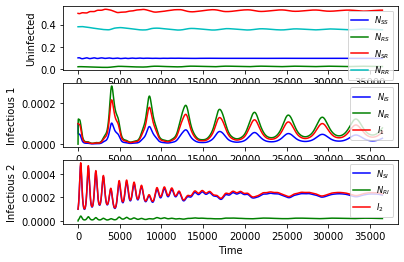

In [5]:
#Ploting
pl.subplot(311)
pl.plot(RES[:,0], 'b-', label=r'$N_{SS}$')
pl.plot(RES[:,2], 'g-', label=r'$N_{RS}$')
pl.plot(RES[:,5], 'r-', label=r'$N_{SR}$')
pl.plot(RES[:,7], 'c-', label=r'$N_{RR}$')
pl.xlabel ('Time')
pl.ylabel ('Uninfected')
pl.legend(loc=1, prop = FontProperties(size='smaller'))
pl.subplot(312)
pl.plot(RES[:,1], 'b-', label=r'$N_{IS}$')
pl.plot(RES[:,6], 'g-', label=r'$N_{IR}$')
pl.plot((RES[:,1]+a[0]*RES[:,6]), 'r-', label=r'$I_1$')
pl.xlabel ('Time')
pl.ylabel ('Infectious 1')
pl.legend(loc=1, prop = FontProperties(size='smaller'))
pl.subplot(313)
pl.plot(RES[:,4], 'b-', label=r'$N_{SI}$')
pl.plot(RES[:,3], 'g-', label=r'$N_{RI}$')
pl.plot((RES[:,4]+a[1]*RES[:,3]), 'r-', label=r'$I_2$')
pl.xlabel ('Time')
pl.ylabel ('Infectious 2')
pl.legend(loc=1, prop = FontProperties(size='smaller'))

### In case Tex commands do not work for you try this:
#pl.subplot(311)
#pl.plot(RES[:,0], 'b-', label='NSS')
#pl.plot(RES[:,2], 'g-', label='NRS')
#pl.plot(RES[:,5], 'r-', label='NSR')
#pl.plot(RES[:,7], 'c-', label='NRR')
#pl.xlabel ('Time')
#pl.ylabel ('Uninfected')
#pl.legend(loc=1)
#pl.subplot(312)
#pl.plot(RES[:,1], 'b-', label='NIS')
#pl.plot(RES[:,6], 'g-', label='NIR')
#pl.plot((RES[:,1]+a[0]*RES[:,6]), 'r-', label='I1')
#pl.xlabel ('Time')
#pl.ylabel ('Infectious 1')
#pl.legend(loc=1)
#pl.subplot(313)
#pl.plot(RES[:,4], 'b-', label='NSI')
#pl.plot(RES[:,3], 'g-', label='NRI')
#pl.plot((RES[:,4]+a[1]*RES[:,3]), 'r-', label='I2')
#pl.xlabel ('Time')
#pl.ylabel ('Infectious 2')
#pl.legend(loc=1)

pl.show()